# Análisis exploratorio de incidencia delictiva en México

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

Series([], Name: frecuencia, dtype: float64)


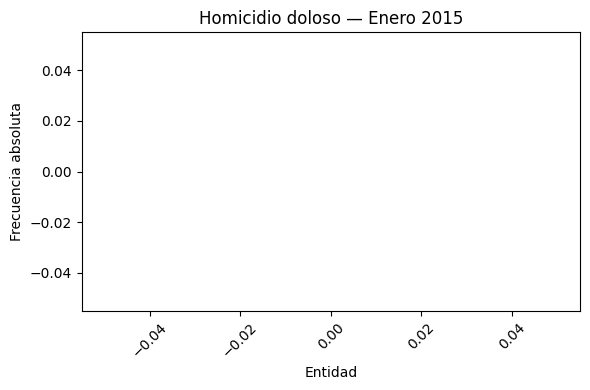

In [30]:
import matplotlib.pyplot as plt

entidades = ["Hidalgo", "Chiapas", "Queretaro"]

df_filtro = df[
    (df['entidad'].isin(entidades)) &
    (df['tipo_de_delito'] == "homicidio") &
    (df['anio'] == 2015) &
    (df['nombre_mes'].str.lower() == "enero")
]

df_frec = df_filtro.groupby("entidad")["frecuencia"].sum()
print(df_frec)

plt.figure(figsize=(6,4))
plt.bar(df_frec.index, df_frec.values)

plt.title("Homicidio doloso — Enero 2015")
plt.xlabel("Entidad")
plt.ylabel("Frecuencia absoluta")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018? 0
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019? 0
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año. 7730
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios? MexicO, agosto
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios? MEXICO 2020

In [48]:
fem_group = df[df['tipo_de_delito'] == "Feminicidio"] \
    .groupby(['entidad', 'nombre_mes'])['frecuencia'].sum()

fem_group.idxmax(), fem_group.max()




(('México', 'agosto'), np.float64(95.0))

#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

/tmp/ipykernel_4382/2842854068.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


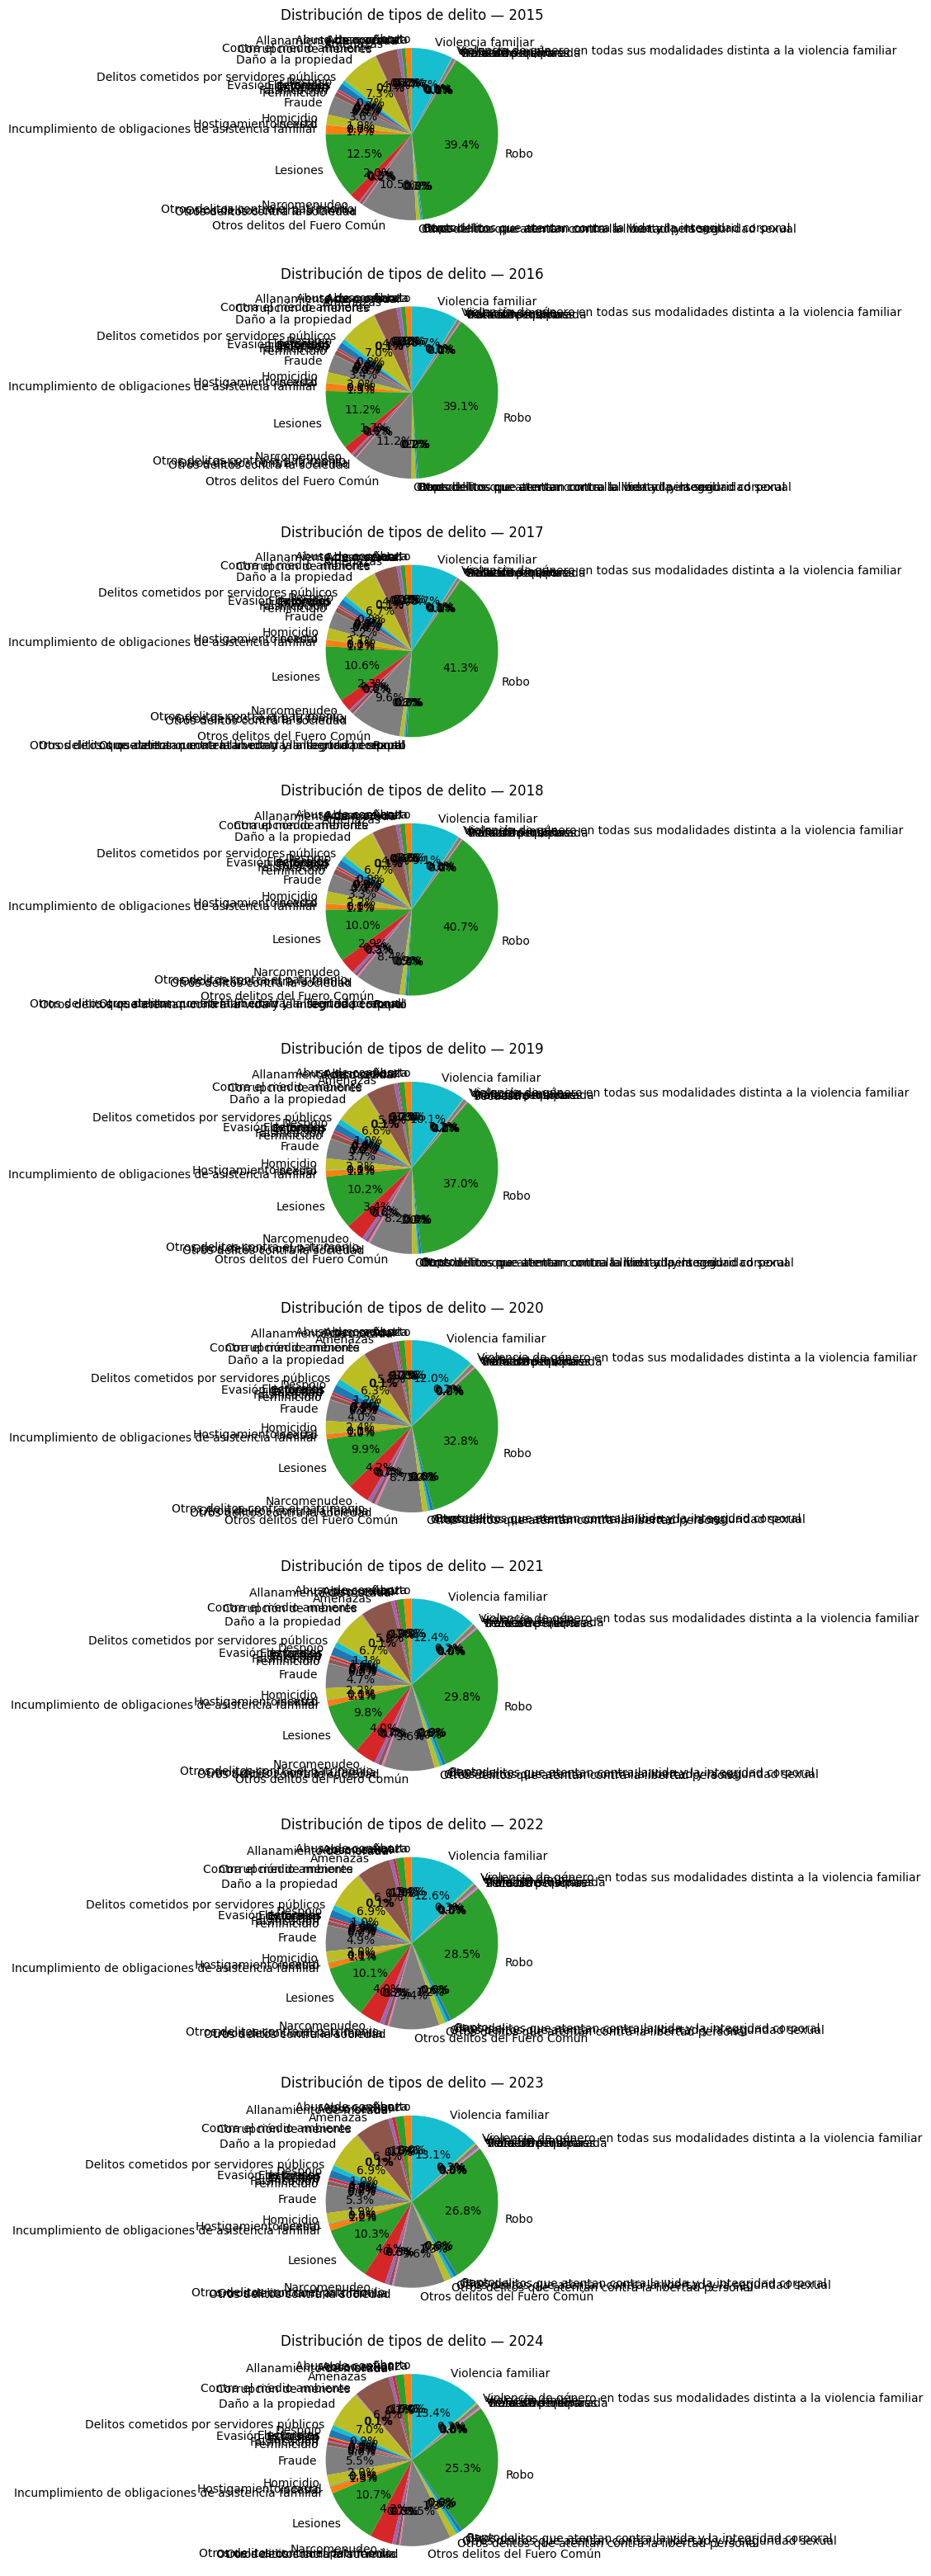

In [32]:
import matplotlib.pyplot as plt

años = df['anio'].unique()
años.sort()

fig, axes = plt.subplots(
    nrows=len(años), 
    ncols=1, 
    figsize=(6, 4 * len(años))
)

if len(años) == 1:
    axes = [axes]


for ax, año in zip(axes, años):
    df_year = df[df['anio'] == año]


    conteo = df_year.groupby('tipo_de_delito')['frecuencia'].sum()

    ax.pie(
        conteo.values,
        labels=conteo.index,
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(f"Distribución de tipos de delito — {año}")

plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [ ]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

In [52]:
df_tasa = df_delitos.merge(pobs, left_on='entidad', right_on='entidad', how='left')
df_tasa['tasa_100k'] = (df_tasa['frecuencia'] / df_tasa['poblacion']) * 100000
df_tasa['tasa_anualizada'] = df_tasa['tasa_100k'] * 12
df_tasa.head()




NameError: name 'df_delitos' is not defined